In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 90)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader as pdr

def get_stock_data(ticker, start, end):
    #read the data
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)
    
    #rename this column
    data.insert(0, 'Ticker', ticker)
    return data

In [3]:
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
get_stock_data("MSFT", start, end)[:5]

           Ticker       High        Low       Open      Close      Volume  Adj Close
Date                                                                                
2012-01-03   MSFT  26.959999  26.389999  26.549999  26.770000  64731500.0  21.572889
2012-01-04   MSFT  27.469999  26.780001  26.820000  27.400000  80516100.0  22.080578
2012-01-05   MSFT  27.730000  27.290001  27.379999  27.680000  56081400.0  22.306215
2012-01-06   MSFT  28.190001  27.530001  27.530001  28.110001  99455500.0  22.652739
2012-01-09   MSFT  28.100000  27.719999  28.049999  27.740000  59706800.0  22.354580

In [4]:
def get_data_for_multiple_stocks(tickers, start, end):
    # return dict
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to dictionary
        stocks[ticker] = s
    return stocks

In [5]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks([
    "MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO",
], start, end)

In [6]:
#take a peek at the data for MSFT
raw["MSFT"][:5]

           Ticker       High        Low       Open      Close      Volume  Adj Close
Date                                                                                
2012-01-03   MSFT  26.959999  26.389999  26.549999  26.770000  64731500.0  21.572884
2012-01-04   MSFT  27.469999  26.780001  26.820000  27.400000  80516100.0  22.080578
2012-01-05   MSFT  27.730000  27.290001  27.379999  27.680000  56081400.0  22.306223
2012-01-06   MSFT  28.190001  27.530001  27.530001  28.110001  99455500.0  22.652740
2012-01-09   MSFT  28.100000  27.719999  28.049999  27.740000  59706800.0  22.354578

In [7]:
#pivots a given column into values with column
def pivot_tickers_to_columns(raw, column):
    items = []
    #loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
        
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    return ri.pivot("Date", "Ticker", column)

In [8]:
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker             AA       AAPL   DAL          GE         IBM         KO       MSFT  \
Date                                                                                   
2012-01-03  22.179689  14.686786  8.04  141.230774  178.107071  35.070000  26.770000   
2012-01-04  22.708349  14.765714  8.01  142.769226  177.380493  34.849998  27.400000   
2012-01-05  22.492081  14.929643  8.33  142.692307  176.539200  34.685001  27.680000   
2012-01-06  22.011480  15.085714  8.32  143.461533  174.512421  34.465000  28.110001   
2012-01-09  22.660290  15.061786  8.28  145.076920  173.604202  34.465000  27.740000   

Ticker            PEP        UAL  
Date                              
2012-01-03  66.400002  18.900000  
2012-01-04  66.739998  18.520000  
2012-01-05  66.220001  18.389999  
2012-01-06  65.389999  18.209999  
2012-01-09  65.730003  17.930000  

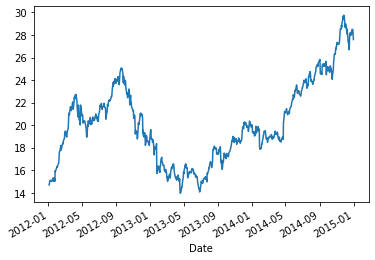

In [9]:
close_px['AAPL'].plot();

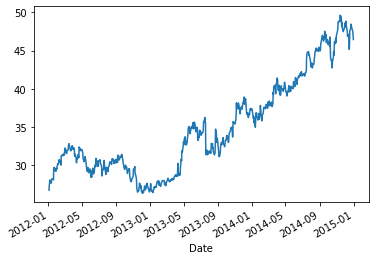

In [10]:
# plot the closing prices of MSFT
close_px["MSFT"].plot();

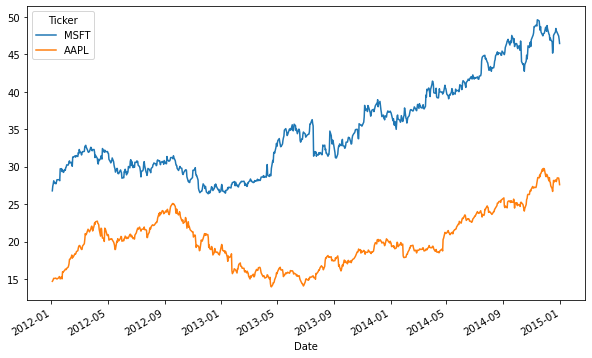

In [11]:
close_px[["MSFT", "AAPL"]].plot(figsize=(10, 6));

In [12]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker             AA         AAPL        DAL         GE        IBM         KO  \
Date                                                                             
2014-12-24  2057511.0   57918400.0  4296200.0  2322463.0  1954033.0  6405900.0   
2014-12-26  2644944.0  134884000.0  5303100.0  1947205.0  2000161.0  6466900.0   
2014-12-29  2949563.0  110395600.0  6656700.0  2711566.0  3485063.0  8694500.0   
2014-12-30  3854390.0  119526000.0  7318900.0  2883985.0  2960075.0  9222000.0   
2014-12-31  3679734.0  165613600.0  7772200.0  3666845.0  4196447.0  9369500.0   

Ticker            MSFT        PEP        UAL  
Date                                          
2014-12-24  11437800.0  1604100.0  2714300.0  
2014-12-26  13197800.0  1492700.0  3062200.0  
2014-12-29  14439500.0  2453800.0  2874300.0  
2014-12-30  16384700.0  2134400.0  2644600.0  
2014-12-31  21552500.0  3727400.0  4440500.0  

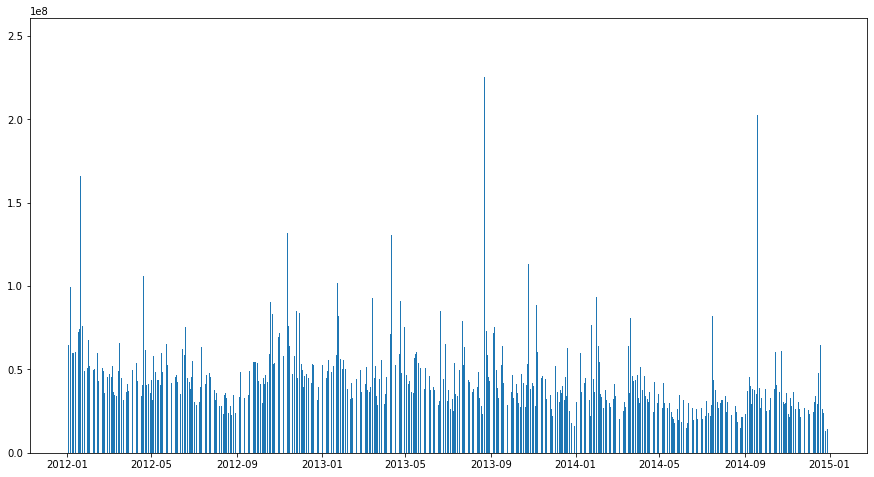

In [13]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15, 8)

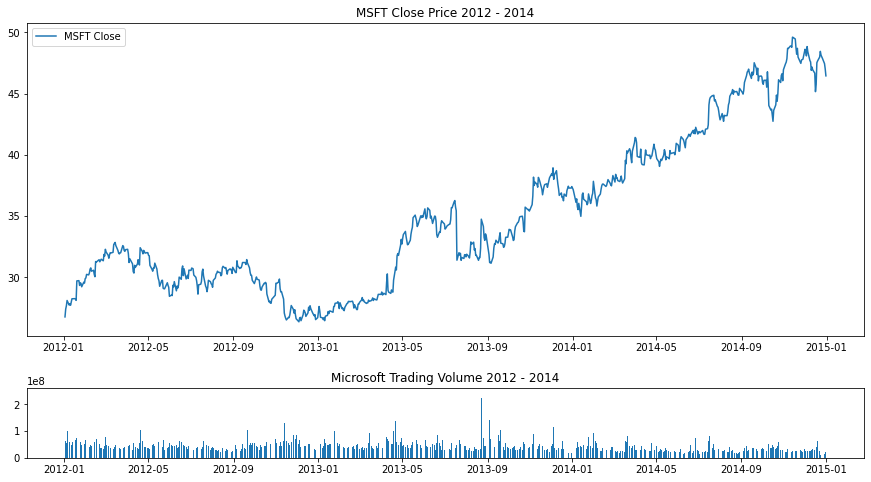

In [14]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(close_px["MSFT"].index, close_px["MSFT"],
         label="MSFT Close")
plt.title("MSFT Close Price 2012 - 2014")
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=2, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title("Microsoft Trading Volume 2012 - 2014")
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

In [16]:
# calculating daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker            AA      AAPL       DAL        GE       IBM        KO      MSFT  \
Date                                                                               
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.023835  0.005374 -0.003731  0.010893 -0.004079 -0.006273  0.023534   
2012-01-05 -0.009524  0.011102  0.039950 -0.000539 -0.004743 -0.004734  0.010219   
2012-01-06 -0.021368  0.010454 -0.001201  0.005391 -0.011481 -0.006343  0.015535   
2012-01-09  0.029476 -0.001586 -0.004808  0.011260 -0.005204  0.000000 -0.013163   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  0.005120 -0.020106  
2012-01-05 -0.007791 -0.007019  
2012-01-06 -0.012534 -0.009788  
2012-01-09  0.005200 -0.015376  

In [18]:
# check the percentage on 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] - 1

0.01110200218007229

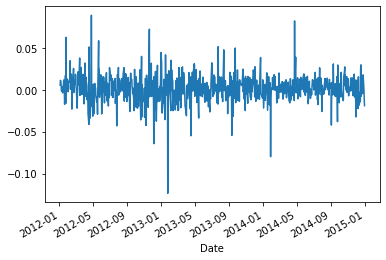

In [19]:
# plot daily percentage change for AAPL
daily_pc['AAPL'].plot();

In [20]:
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker            AA      AAPL       DAL        GE       IBM        KO      MSFT  \
Date                                                                               
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  1.023835  1.005374  0.996269  1.010893  0.995921  0.993727  1.023534   
2012-01-05  1.014085  1.016536  1.036070  1.010349  0.991197  0.989022  1.033993   
2012-01-06  0.992416  1.027162  1.034826  1.015795  0.979817  0.982749  1.050056   
2012-01-09  1.021668  1.025533  1.029851  1.027233  0.974718  0.982749  1.036235   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  1.005120  0.979894  
2012-01-05  0.997289  0.973016  
2012-01-06  0.984789  0.963492  
2012-01-09  0.989910  0.948677  

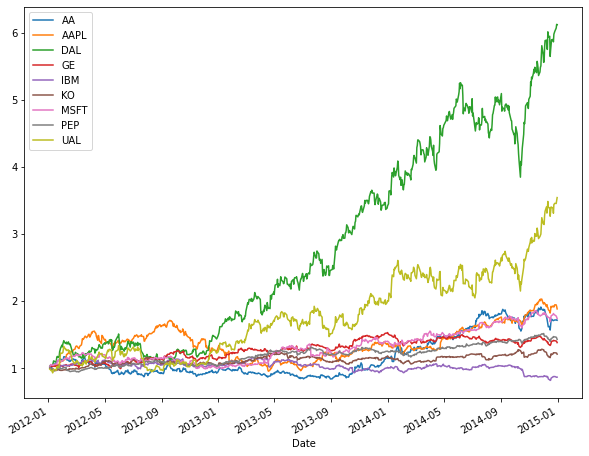

In [22]:
# plot all the cumulative returns to get an idea
# of the relative performance of all the stocks
daily_cr.plot(figsize=(10, 8))
plt.legend(loc=2);

In [23]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker             AA       AAPL    DAL          GE         IBM         KO       MSFT  \
Date                                                                                    
2012-01-31  24.414480  16.302856  10.55  143.923080  184.130020  33.764999  29.530001   
2012-02-29  24.438511  19.372856   9.81  146.538467  188.078400  34.930000  31.740000   
2012-03-31  24.438511  19.372856   9.81  146.538467  188.078400  34.930000  31.740000   
2012-04-30  23.381189  20.856428  10.96  150.615387  197.973236  38.160000  32.020000   
2012-05-31  20.545650  20.633215  12.10  146.846161  184.416824  37.365002  29.190001   

Ticker            PEP    UAL  
Date                          
2012-01-31  65.669998  23.10  
2012-02-29  62.939999  20.65  
2012-03-31  62.939999  20.65  
2012-04-30  66.000000  21.92  
2012-05-31  67.849998  25.17  

In [24]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker            AA      AAPL       DAL        GE       IBM        KO      MSFT  \
Date                                                                               
2012-01-31       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012-02-29  0.000984  0.188311 -0.070142  0.018172  0.021443  0.034503  0.074839   
2012-03-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2012-04-30 -0.043265  0.076580  0.117227  0.027821  0.052610  0.092471  0.008822   
2012-05-31 -0.121274 -0.010702  0.104015 -0.025026 -0.068476 -0.020833 -0.088382   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  
2012-04-30  0.048618  0.061501  
2012-05-31  0.028030  0.148266  

In [25]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker            AA      AAPL       DAL        GE       IBM        KO      MSFT  \
Date                                                                               
2012-01-31       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012-02-29  1.000984  1.188311  0.929858  1.018172  1.021443  1.034503  1.074839   
2012-03-31  1.000984  1.188311  0.929858  1.018172  1.021443  1.034503  1.074839   
2012-04-30  0.957677  1.279311  1.038863  1.046499  1.075182  1.130164  1.084321   
2012-05-31  0.841535  1.265620  1.146919  1.020310  1.001558  1.106619  0.988486   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29  0.958429  0.893939  
2012-03-31  0.958429  0.893939  
2012-04-30  1.005025  0.948918  
2012-05-31  1.033196  1.089610  

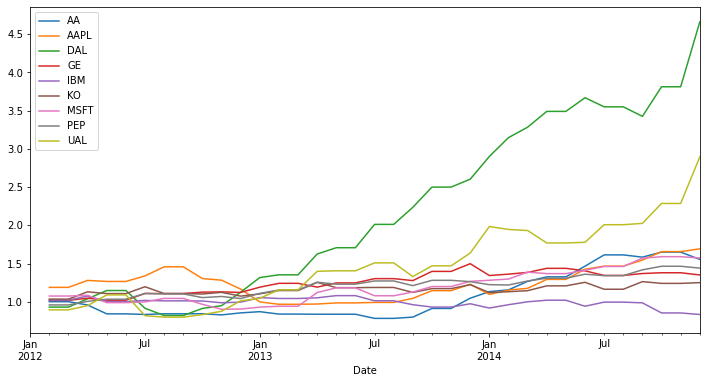

In [26]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12, 6))
plt.legend(loc=2);

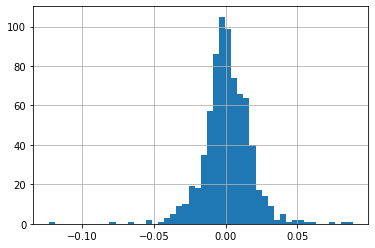

In [27]:
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

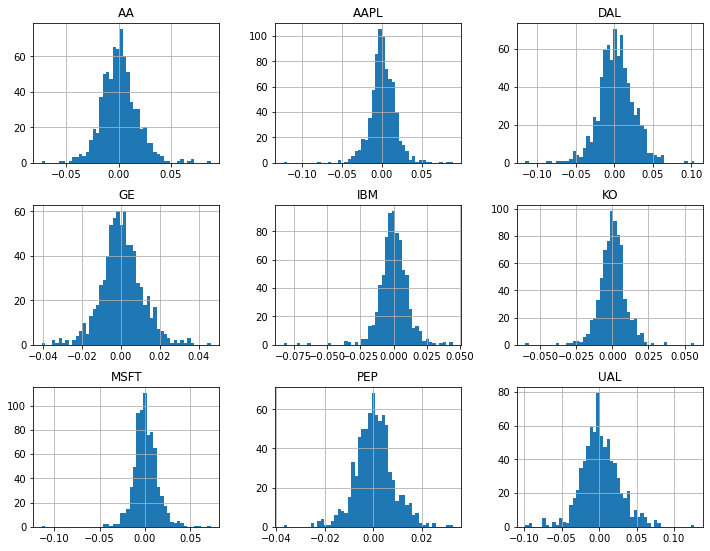

In [39]:
# matrix of all stocks daily % changes histogram
daily_pc.hist(bins=50, figsize = (12, 8));
plt.subplots_adjust(top=1)

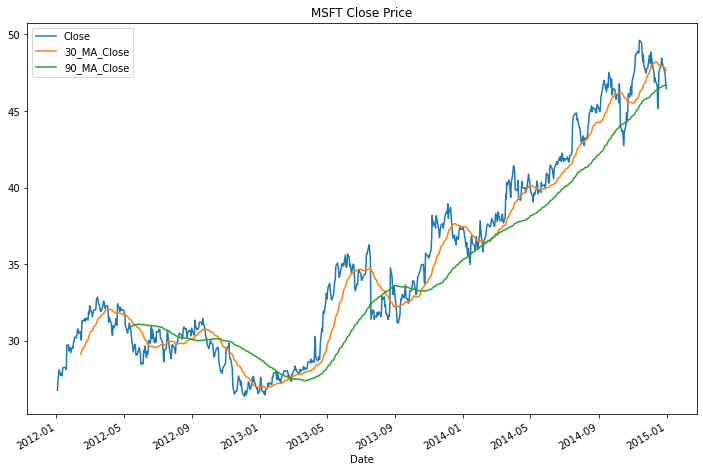

In [40]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compare into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close,
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12, 8)

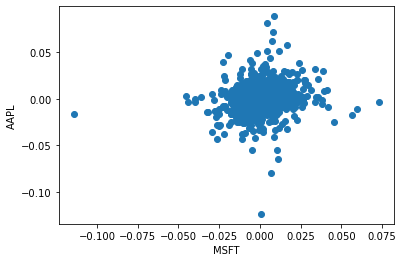

In [43]:
# plot the daily percentage of MSFT and AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

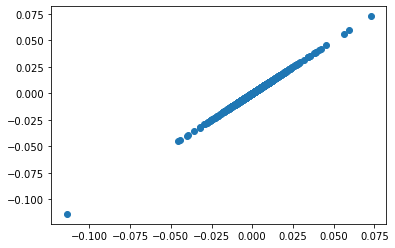

In [44]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

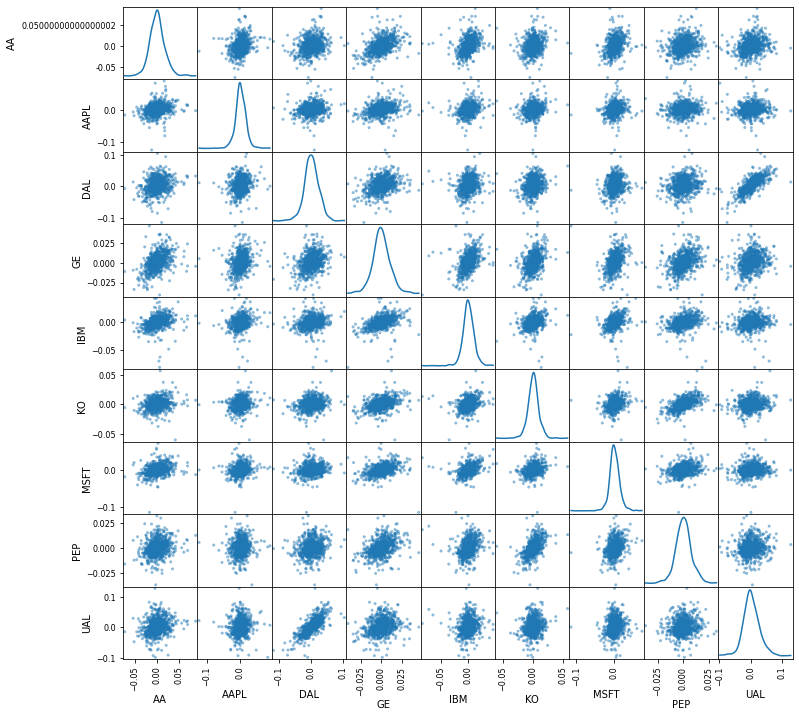

In [45]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12, 12));

In [46]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs =  daily_pc.corr()
corrs

Ticker        AA      AAPL       DAL        GE       IBM        KO      MSFT       PEP  \
Ticker                                                                                   
AA      1.000000  0.238155  0.250570  0.458091  0.311185  0.225809  0.310952  0.221750   
AAPL    0.238155  1.000000  0.136758  0.238882  0.213496  0.157887  0.182781  0.096902   
DAL     0.250570  0.136758  1.000000  0.318261  0.166218  0.187431  0.152909  0.174172   
GE      0.458091  0.238882  0.318261  1.000000  0.427995  0.386339  0.340142  0.373410   
IBM     0.311185  0.213496  0.166218  0.427995  1.000000  0.300549  0.354350  0.252805   
KO      0.225809  0.157887  0.187431  0.386339  0.300549  1.000000  0.267558  0.553574   
MSFT    0.310952  0.182781  0.152909  0.340142  0.354350  0.267558  1.000000  0.280875   
PEP     0.221750  0.096902  0.174172  0.373410  0.252805  0.553574  0.280875  1.000000   
UAL     0.221425  0.061734  0.761222  0.236525  0.122614  0.139971  0.128079  0.124301   

Ticker   

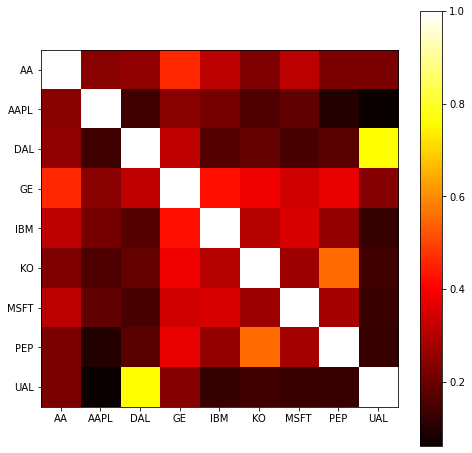

In [47]:
# plot a heatmap of the correlation
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8, 8)

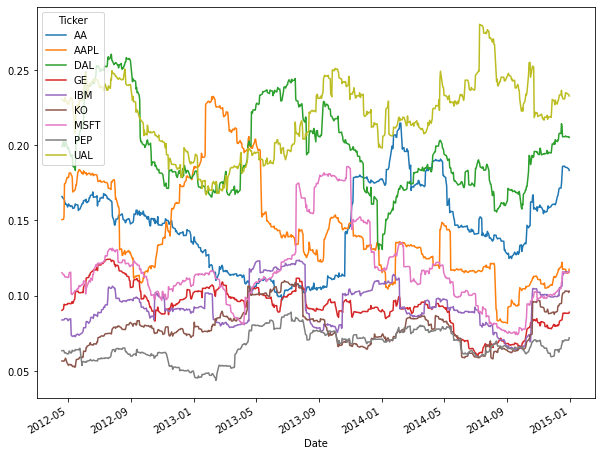

In [48]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot
vol.plot(figsize=(10, 8));

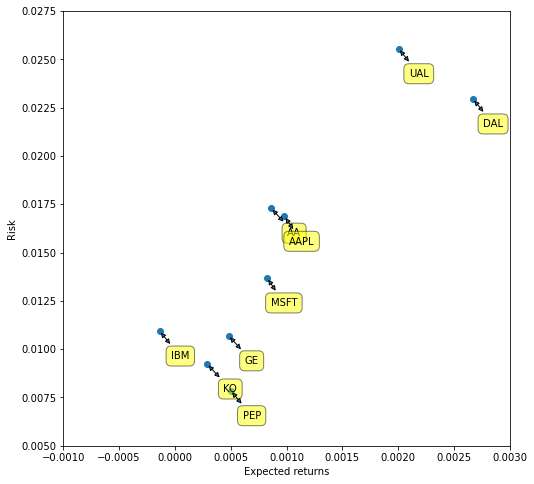

In [51]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns,
                       daily_pc.mean(),
                       daily_pc.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right',
        va = 'bottom',
        bbox = dict(boxstyle = 'round, pad=0.5',
                    fc = 'yellow',
                    alpha=0.5),
        arrowprops = dict(arrowstyle = '<|-|>',
                          connectionstyle = 'arc3, rad=0')
    )

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)